In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/examples/AMAZON-REVIEW-DATA-CLASSIFICATION.csv",usecols=["reviewText","isPositive"])

In [33]:
df.head()

,reviewText,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",1.0
1,unable to open or use,0.0
2,Waste of money!!! It wouldn't load to my system.,0.0
3,I attempted to install this OS on two differen...,0.0
4,I've spent 14 fruitless hours over the past tw...,0.0


In [34]:
df["isPositive"]=df["isPositive"].apply(lambda x:int(x))

In [35]:
df.head()

,reviewText,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",1
1,unable to open or use,0
2,Waste of money!!! It wouldn't load to my system.,0
3,I attempted to install this OS on two differen...,0
4,I've spent 14 fruitless hours over the past tw...,0


In [36]:
df.isnull().sum()

reviewText    12
isPositive     0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

reviewText    0
isPositive    0
dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(df["reviewText"],df["isPositive"],test_size=0.2,random_state=42)

In [53]:
Count_vec_model=Pipeline([("vectorizer",CountVectorizer()),("classifier",MultinomialNB())])
TFIDF_vec_model=Pipeline([("vectorizer",TfidfVectorizer()),("classifier",MultinomialNB())])

In [56]:
Count_vec_model.fit(X_train.values,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [58]:
TFIDF_vec_model.fit(X_train.values,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [57]:
Count_vec_model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [59]:
TFIDF_vec_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 1])

In [60]:
count_model_preds=Count_vec_model.predict(X_test)
TFIDF_model_preds=TFIDF_vec_model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
print(accuracy_score(count_model_preds,y_test), accuracy_score(TFIDF_model_preds,y_test))

0.8389769967138163 0.8281897413916274


In [74]:
print(confusion_matrix(count_model_preds,y_test),end="\n")
print("*"*50)
print(confusion_matrix(TFIDF_model_preds,y_test),end="\n")

[[4055 1050]
 [1204 7689]]
**************************************************
[[3255  401]
 [2004 8338]]


In [77]:
print(classification_report(count_model_preds,y_test))
print("*"*70)
print(classification_report(TFIDF_model_preds,y_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5105
           1       0.88      0.86      0.87      8893

    accuracy                           0.84     13998
   macro avg       0.83      0.83      0.83     13998
weighted avg       0.84      0.84      0.84     13998

**********************************************************************
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      3656
           1       0.95      0.81      0.87     10342

    accuracy                           0.83     13998
   macro avg       0.79      0.85      0.80     13998
weighted avg       0.87      0.83      0.84     13998



In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Predicted')

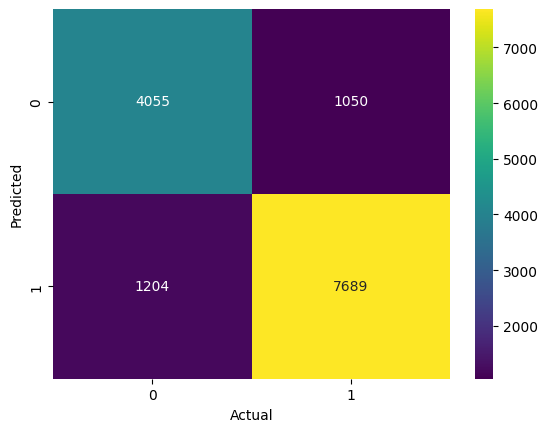

In [82]:
sns.heatmap(confusion_matrix(count_model_preds,y_test),cmap="viridis",fmt="d",annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(50.722222222222214, 0.5, 'Predicted')

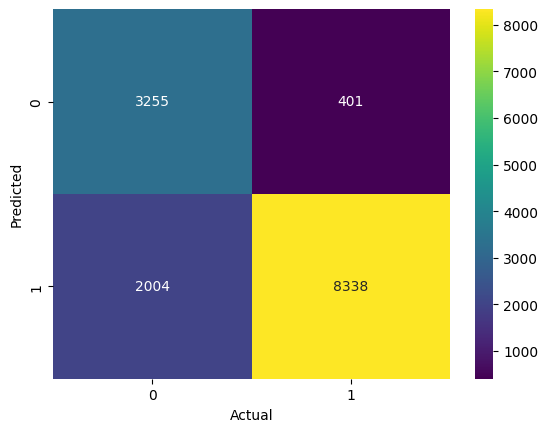

In [83]:
sns.heatmap(confusion_matrix(TFIDF_model_preds,y_test),cmap="viridis",fmt="d",annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")